# Feature Engineering and Selection
### Feature engineering and selection

1. Check for non-informative predictors
    - is there a feature with ≤5−10% variance
    - Wrapper methods to find the optimal combination of features that maximizes model performance
2. Check for missingness
    - what type of missingness it is? (informative or random)
    - KNN imputation
3. Check for skewness
    - normalize
4. Do we need to center and scale (standardize)?
    - log
    - z-score
    - rescaling
5. Check for extreme values
6. Check for imbalanced distributions
7. Check for redundant features
8. Perform dimension reduction (e.g., PCA) on numeric features.
9. Do we need to one-hot or dummy encode categorical features? (ocean proximity)

### Target transformation

- Check for skewness
    - box cox
    - Yeo-Johnson

### Exploratory data analysis

- Clustering (based on ocean proximity?)

### Data splitting

- Simple random sampling
- Stratified sampling
- Validation set
    - bootstrapping
    - k-fold validation

### Measure predictive accuracy

- MSE
- RMSE
## Prerequisites

In [37]:
# helper packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
import sklearn 
from sklearn.feature_selection import VarianceThreshold


## Cali dataset

In [56]:
# read california housing dataset
cali = pd.read_csv("../data/housing.csv")
# show dimensions
cali.shape

(20640, 10)

In [5]:
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
cali.sample(20)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4004     -118.61     34.15                32.0       4491.0           815.0   
1265     -121.71     37.99                27.0       3861.0           718.0   
4769     -118.35     34.04                41.0       1617.0           423.0   
6194     -117.90     34.08                32.0       2068.0           356.0   
4737     -118.38     34.05                52.0       1241.0           210.0   
11479    -118.02     33.73                24.0       6393.0          1141.0   
4217     -118.27     34.11                39.0       3825.0           916.0   
3058     -119.69     35.62                18.0        820.0           239.0   
18628    -121.87     37.10                20.0       1918.0           304.0   
20517    -121.54     38.58                30.0       4648.0          1252.0   
19841    -119.10     36.43                24.0       1039.0           190.0   
16276    -121.26     37.93                33.0       2109.0           531.0   
12190    -117.35     33.68                10.0        516.0           107.0   
20565    -121.70     38.65                22.0       1360.0           282.0   
18349    -122.17     37.43                24.0       3924.0          1142.0   
19031    -122.02     38.37                16.0       2495.0           331.0   
6039     -117.73     34.07                33.0       1025.0           261.0   
2519     -122.18     39.70                23.0       1658.0           307.0   
3431     -118.44     34.27                35.0        777.0           187.0   
18317    -122.12     37.44                33.0       1509.0           303.0   

       population  households  median_income  median_house_value  \
4004       1696.0       749.0         4.9102            319100.0   
1265       2085.0       707.0         3.3558            129700.0   
4769       1110.0       375.0         2.4635            169400.0   
6194        976.0       370.0         5.2120            201200.0   
4737        526.0       214.0         4.4191            334100.0   
11479      2743.0      1057.0         5.1384            336900.0   
4217       1378.0       746.0         4.4094            352600.0   
3058       1345.0       207.0         2.1186             47500.0   
18628       798.0       302.0         7.5755            402300.0   
20517      2524.0      1089.0         1.3177             74300.0   
19841       643.0       193.0         2.6711             71300.0   
16276      2248.0       588.0         1.4583             53000.0   
12190       282.0        96.0         4.2788            125000.0   
20565       808.0       229.0         2.4167            225000.0   
18349      7174.0       950.0         4.0972            387500.0   
19031      1118.0       338.0         6.4894            198000.0   
6039        854.0       269.0         2.2596            119400.0   
2519        836.0       297.0         3.3500             85400.0   
3431       1022.0       186.0         3.4000            139600.0   
18317       748.0       268.0         4.8750            373400.0   

      ocean_proximity  
4004        <1H OCEAN  
1265           INLAND  
4769        <1H OCEAN  
6194        <1H OCEAN  
4737        <1H OCEAN  
11479       <1H OCEAN  
4217        <1H OCEAN  
3058           INLAND  
18628       <1H OCEAN  
20517          INLAND  
19841          INLAND  
16276          INLAND  
12190       <1H OCEAN  
20565          INLAND  
18349      NEAR OCEAN  
19031          INLAND  
6039           INLAND  
2519           INLAND  
3431        <1H OCEAN  
18317        NEAR BAY

In [7]:
cali.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
cali.duplicated().sum()

0

In [9]:
cali.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [10]:
cali.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

<AxesSubplot:>

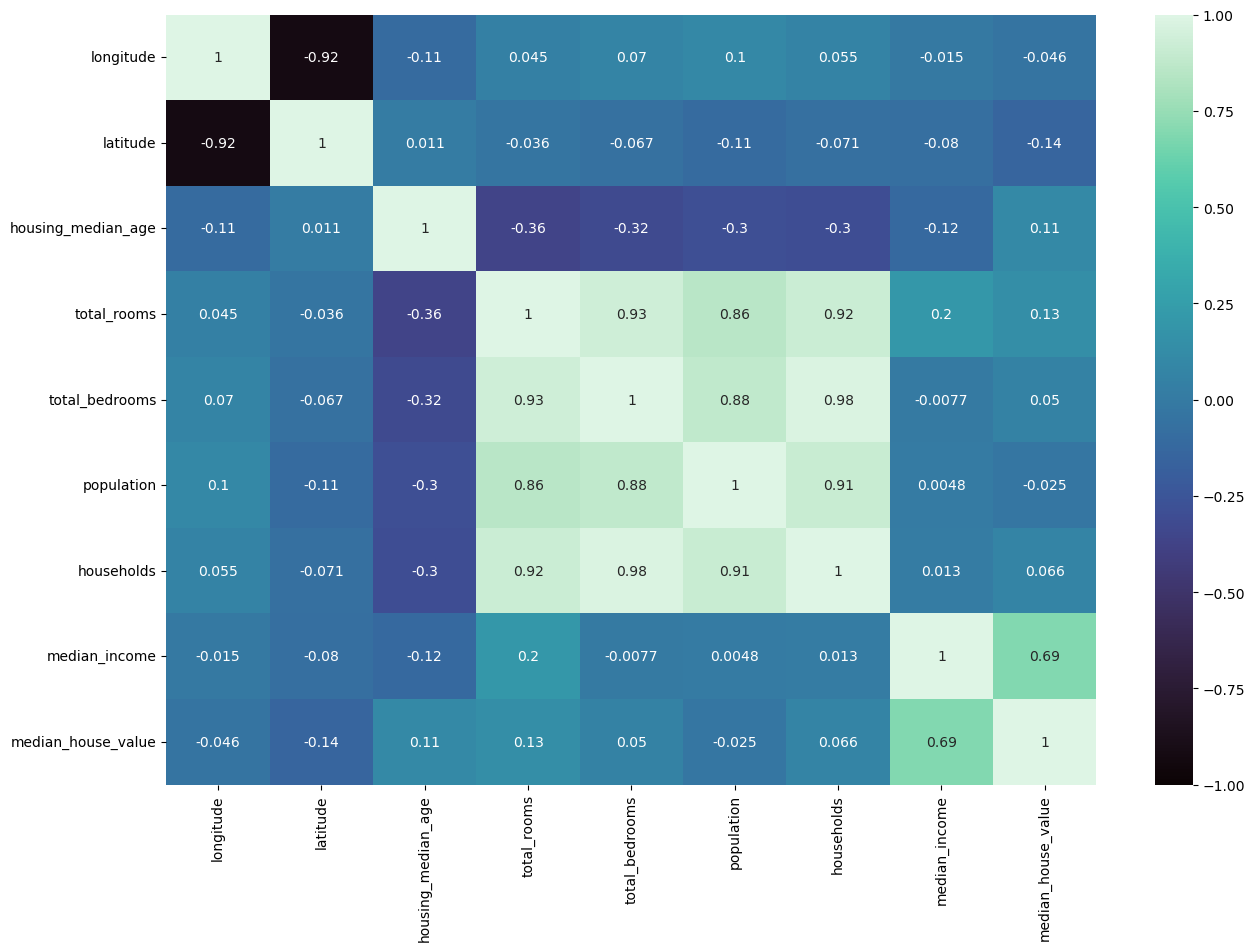

In [11]:

plt.figure(figsize=(15,10))
sns.heatmap(cali.corr(),cmap='mako', annot=True, vmin=-1, vmax=1)

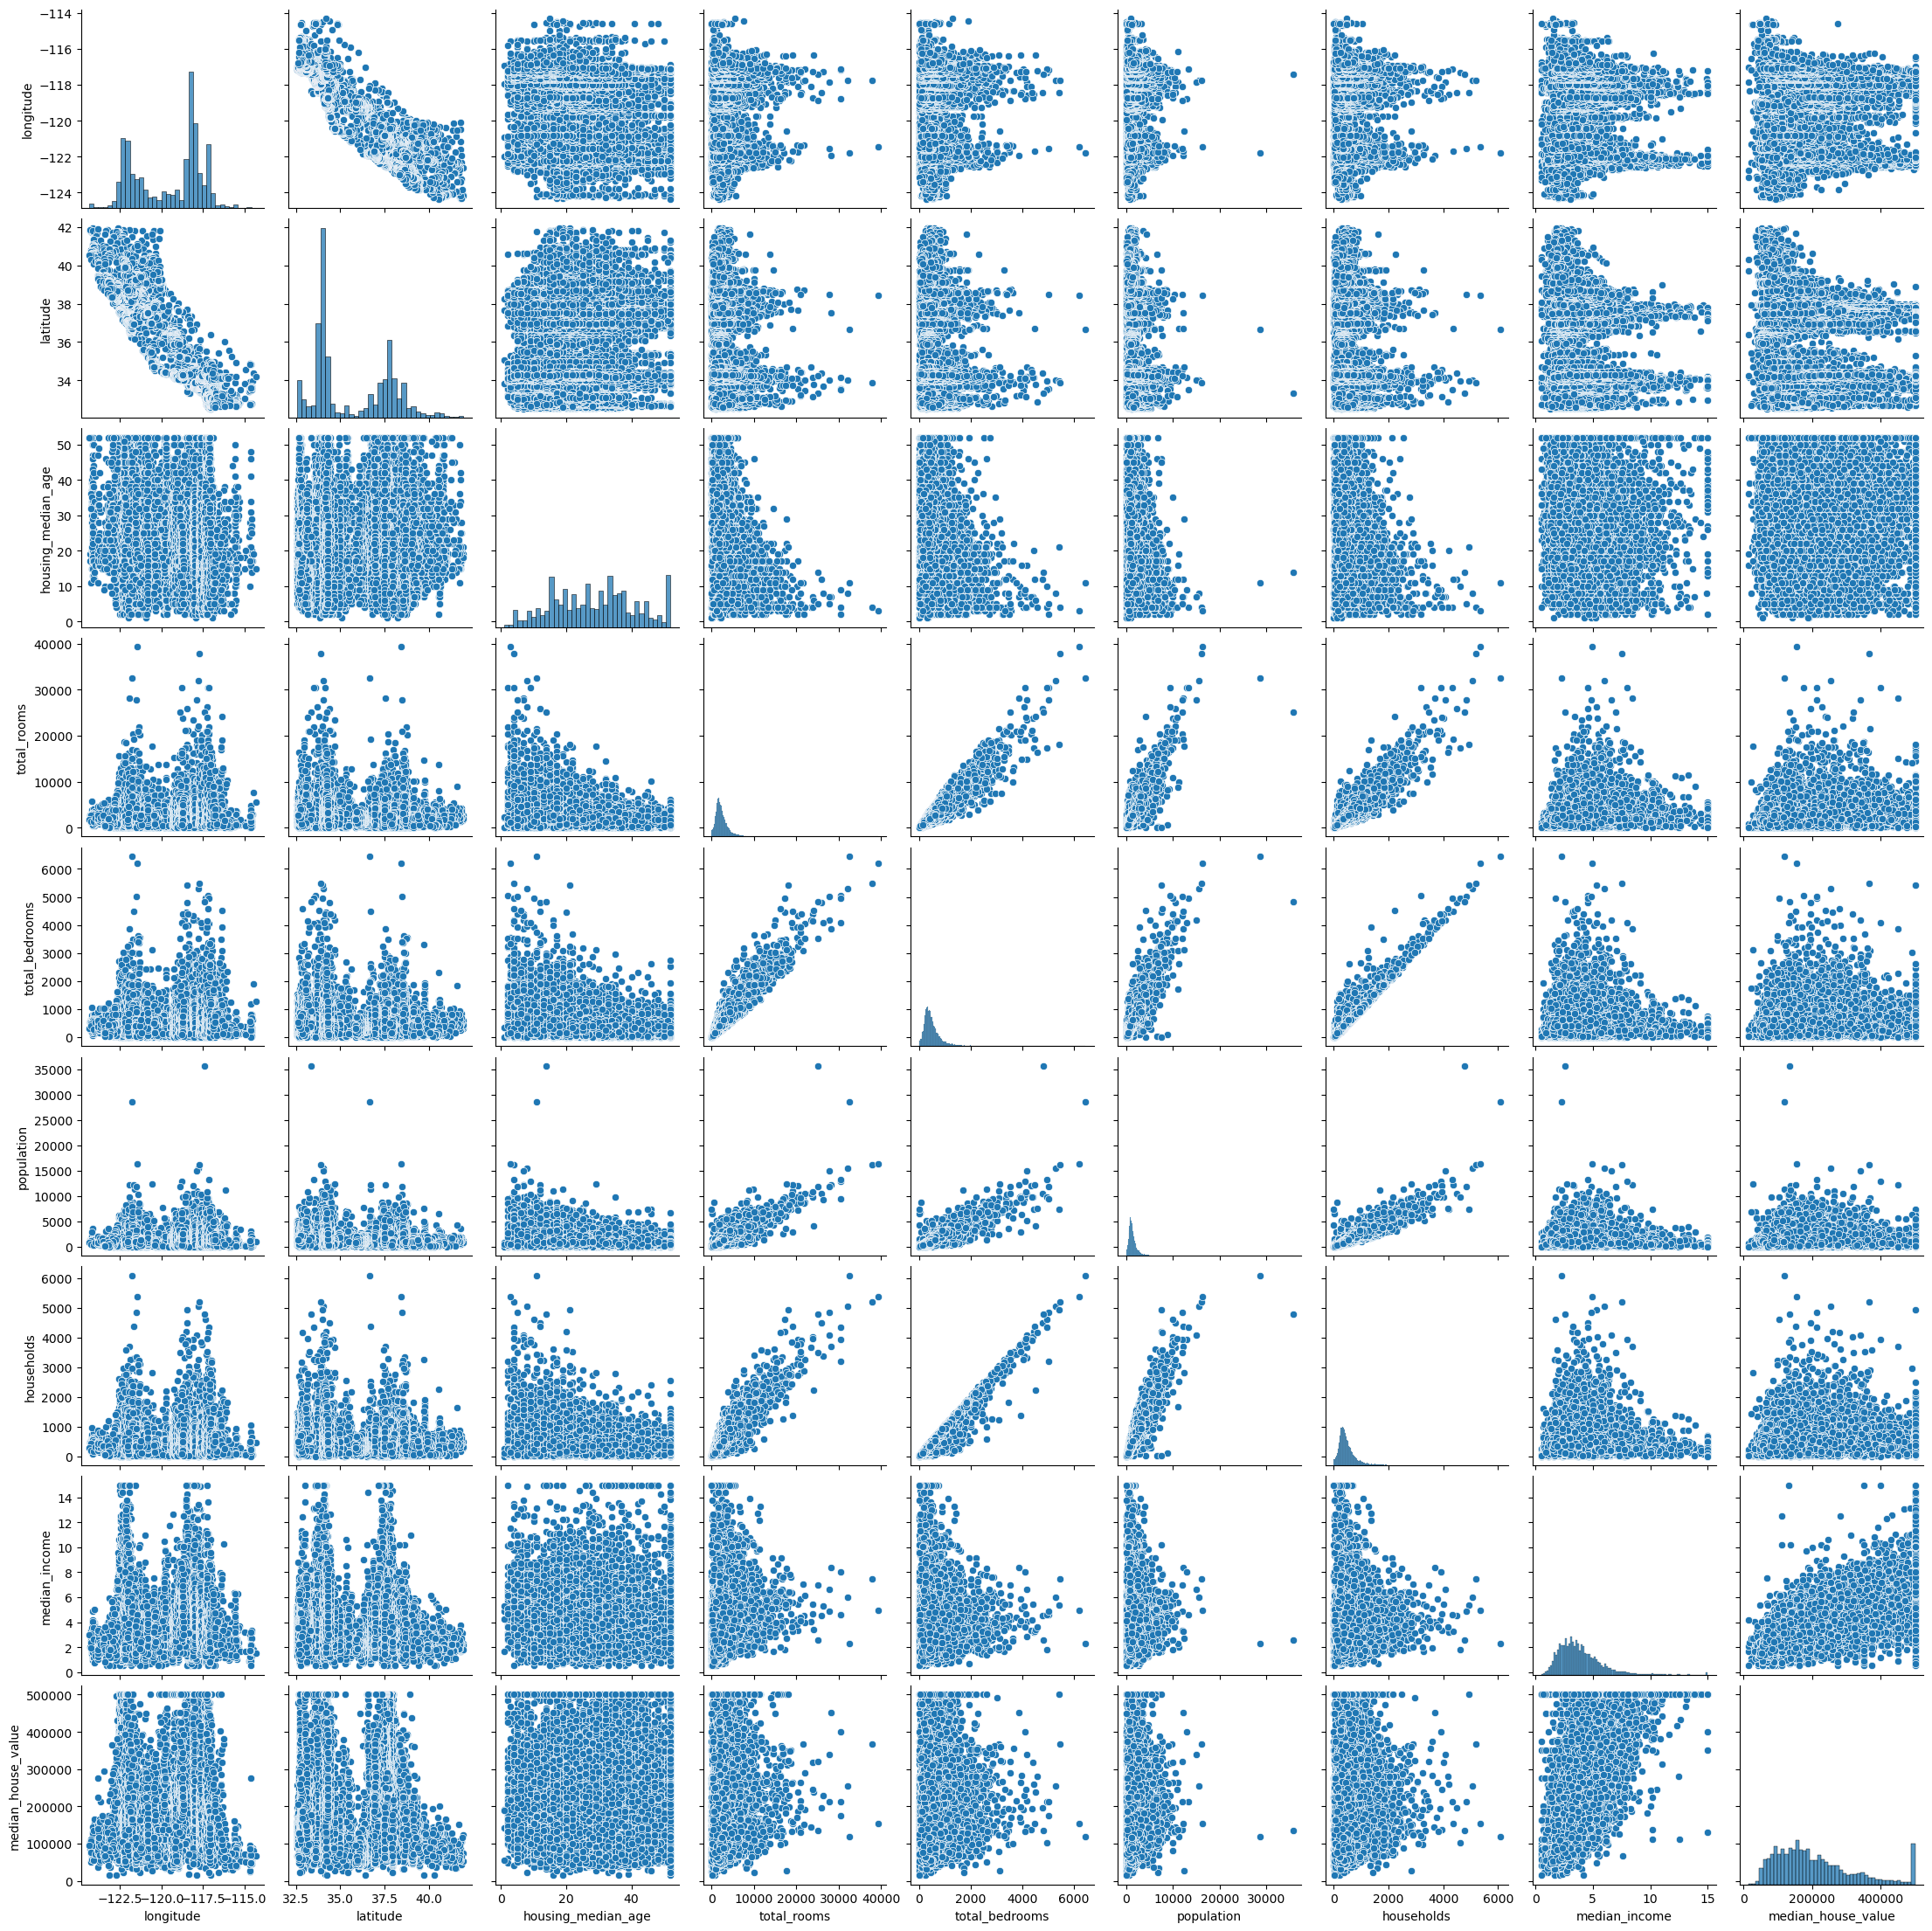

In [12]:

sns.pairplot(cali, plot_kws=dict());

In [39]:
# featues
X = cali.drop("median_house_value", axis=1)
X.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income ocean_proximity  
0       322.0       126.0         8.3252        NEAR BAY  
1      2401.0      1138.0         8.3014        NEAR BAY  
2       496.0       177.0         7.2574        NEAR BAY  
3       558.0       219.0         5.6431        NEAR BAY  
4       565.0       259.0         3.8462        NEAR BAY

In [40]:
# target variable
Y = cali["median_house_value"]
Y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

## Check for non-informative predictors .>>>

### Feature variance
After testing for feature variace, we could see that there were no constant features, so none were deleted

In [42]:
# remove low variance features
var_thres = VarianceThreshold(threshold=0)
# exception for categorical features
var_thres.fit(X.drop("ocean_proximity", axis=1))
# shows which column is non constant (True)
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Check for missingness <<>>

<AxesSubplot:>

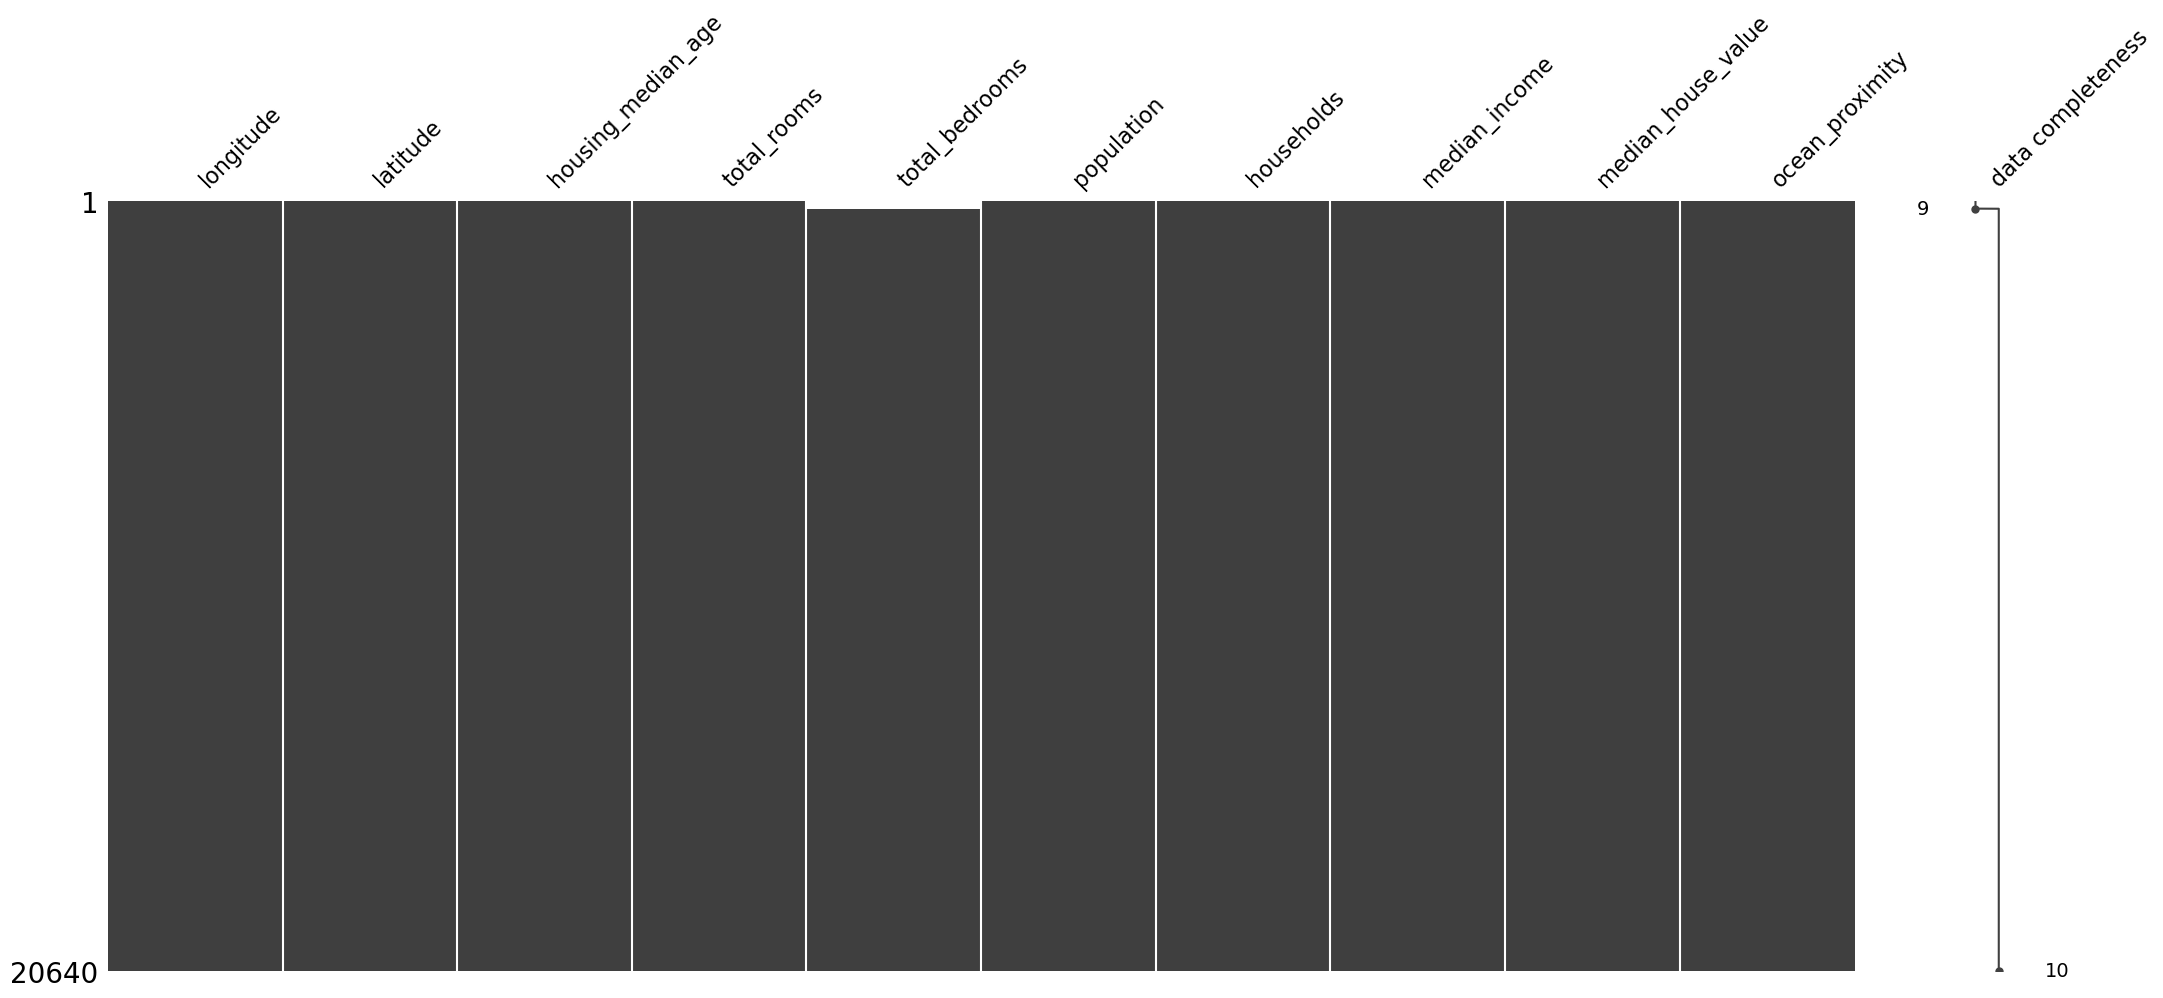

In [15]:
msno.matrix(cali, labels=True, filter="bottom", sort="ascending", n=50)

why its missing 

## Check for skewness >>> 

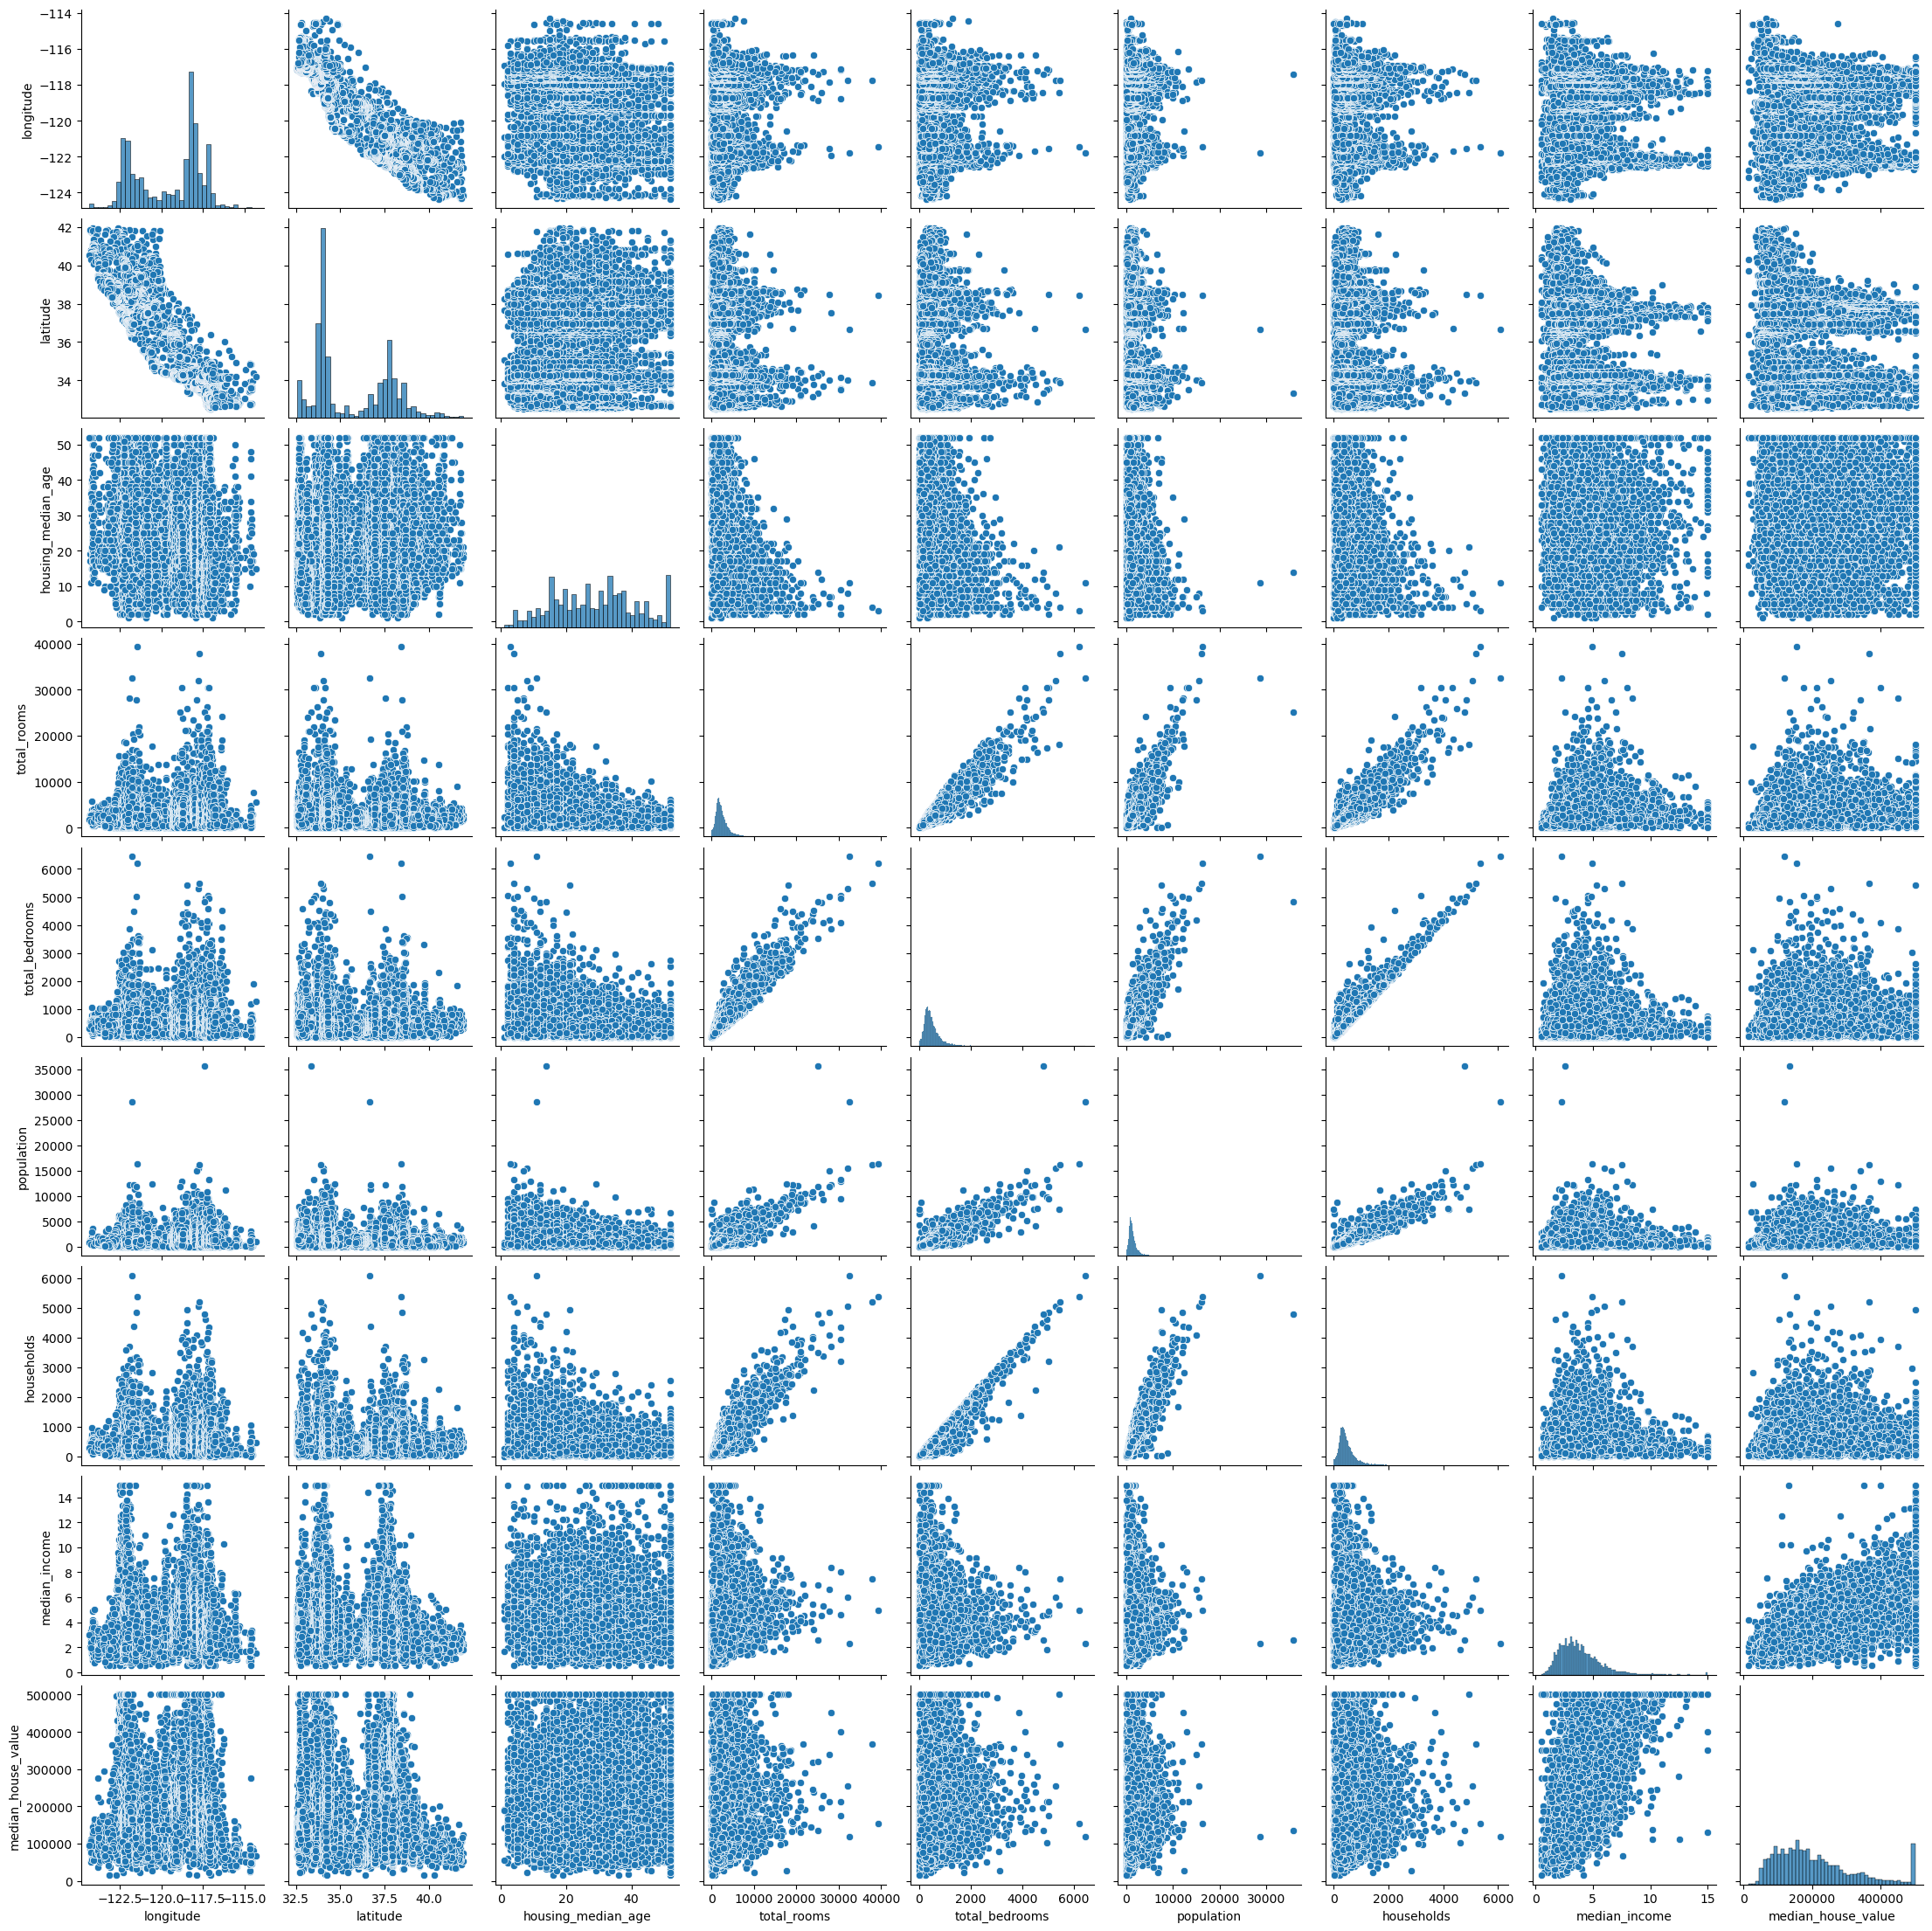

In [16]:
sns.pairplot(cali, plot_kws=dict());

## Data Standardization

## Check for extreme values
### outlier detection

Note that extreme value detection and removal only applies to numerical features. 
To do it we first plot a boxplot of some feature, if we notice it has outliers we run the outlier removal function

<AxesSubplot:>

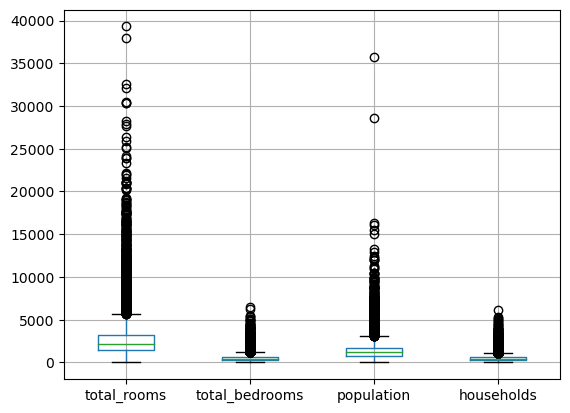

In [66]:
cali.boxplot(["total_rooms", "total_bedrooms", "population", "households"])

<AxesSubplot:xlabel='median_income'>

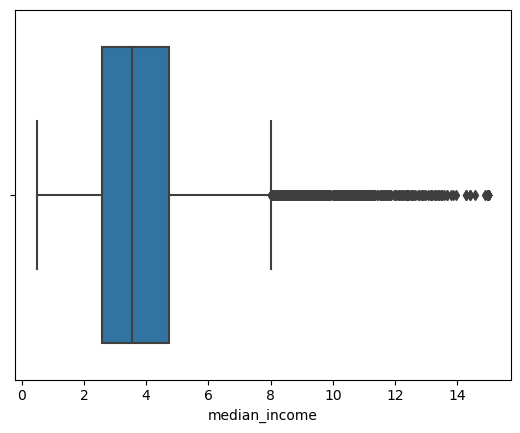

In [69]:
sns.boxplot(x=cali["median_income"])

### outlier removal

In [ ]:
for x in ['median_income']:
    q75,q25 = np.percentile(cali.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    cali.loc[cali[x] < min,x] = np.nan
    cali.loc[cali[x] > max,x] = np.nan

In [74]:
for x in ["total_rooms"]:
    q75,q25 = np.percentile(cali.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    cali.loc[cali[x] < min,x] = np.nan
    cali.loc[cali[x] > max,x] = np.nan

In [75]:
for x in ["total_bedrooms"]:
    q75,q25 = np.percentile(cali.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    cali.loc[cali[x] < min,x] = np.nan
    cali.loc[cali[x] > max,x] = np.nan

In [76]:
for x in ["population"]:
    q75,q25 = np.percentile(cali.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    cali.loc[cali[x] < min,x] = np.nan
    cali.loc[cali[x] > max,x] = np.nan

In [77]:
for x in ["households"]:
    q75,q25 = np.percentile(cali.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    cali.loc[cali[x] < min,x] = np.nan
    cali.loc[cali[x] > max,x] = np.nan

In [78]:
cali.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms           1287
total_bedrooms         207
population            1196
households            1220
median_income          681
median_house_value       0
ocean_proximity          0
dtype: int64

In [79]:
cali = cali.dropna(axis = 0)

<AxesSubplot:>

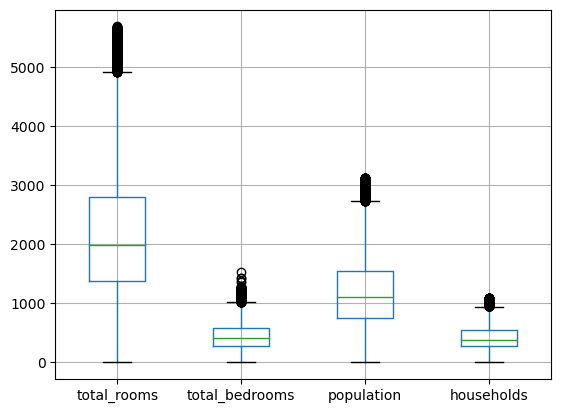

In [80]:
#cali.isnull().sum()
cali.boxplot(["total_rooms", "total_bedrooms", "population", "households"])

## Check for imbalanced distributions
Check for factor variable where some levels are very common while others very rare. After using value counts on ocean proximity feature, we can see that 'NEAR OCEAN', 'NEAR BAY' and 'ISLAND' have way lower value counts, in this case we can use Lumping to group them together into one category called 'OTHER'

In [88]:
cali["ocean_proximity"].value_counts()

<1H OCEAN    7840
INLAND       5851
OTHER        4360
Name: ocean_proximity, dtype: int64

In [ ]:
# replace the values near ocean, near bay and island with other
#cali["ocean_proximity"] = cali["ocean_proximity"].loc[row_indexer,col_indexer] = value
cali["ocean_proximity"] = cali["ocean_proximity"].replace(['NEAR OCEAN', 'NEAR BAY', 'ISLAND'], 'OTHER')


In [ ]:
cali["ocean_proximity"].value_counts()

## Check for redundant features

## Dimension reduction

## One-hot encoding / Dummy encoding

In [89]:
# encode categorical variables as numeric using dummy encoding
data_encoded=pd.get_dummies(data=cali,drop_first=True)
data_encoded

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
5           413.0       193.0         4.0368            269700.0   
6          1094.0       514.0         3.6591            299200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity_INLAND  ocean_proximity_OTHER  
2                           0                      1  
3                           0                      1  
4                           0                      1  
5                           0                      1  
6                           0                      1  
...                       ...                    ...  
20635                       1                      0  
20636                       1                      0  
20637                       1                      0  
20638                       1                      0  
20639                       1                      0  

[18051 rows x 11 columns]

# Target Transformation
## Check for skewness